## How to filter and display the clinical data using pandas

In [1]:
# Load methods from src.clinical_data.py and necessary libraries
import sys
sys.path.append('..')  # Add the parent directory to the path
from src.clinical_data import *

In [2]:
# Define the dataset paths and folders (adjust path if necessary)
dataset_path = '/datasets/mama_mia_dataset'
clinical_excel_path = dataset_path + '/clinical_and_imaging_info.xlsx'

# Load the clinical data 
clinical_data_df = pd.read_excel(clinical_excel_path, sheet_name='dataset_info')
display(clinical_data_df.head())

,patient_id,dataset,bilateral_breast_cancer,multifocal_cancer,nac_agent,endocrine_therapy,anti_her2_neu_therapy,pcr,mastectomy_post_nac,days_to_follow_up,...,manufacturer,scanner_model,high_bit,window_center,window_width,echo_time,repetition_time,acquisition_times,acquisition_date,tcia_series_uid
0,DUKE_001,DUKE,0,0.0,NaN,0.0,1.0,0.0,0.0,2940.0,...,SIEMENS,Avanto,11,53.0,145.0,1.360,4.120,"[0, 584, 714, 846, 977]",NaN,1.3.6.1.4.1.14519.5.2.1.1857778498036652445367...
1,DUKE_002,DUKE,0,0.0,NaN,0.0,0.0,0.0,0.0,1649.0,...,GE,Signa HDxt,15,326.0,652.0,2.704,6.918,"[0, 165, 288, 411]",NaN,1.3.6.1.4.1.14519.5.2.1.2920879504444133146439...
2,DUKE_005,DUKE,0,1.0,NaN,0.0,1.0,1.0,1.0,1845.0,...,SIEMENS,Avanto,11,106.0,288.0,1.340,4.270,"[0, 183, 289, 398]",NaN,1.3.6.1.4.1.14519.5.2.1.3082672827908226352755...
3,DUKE_009,DUKE,0,1.0,NaN,0.0,0.0,1.0,0.0,1554.0,...,GE,Signa HDxt,15,231.0,462.0,2.604,6.032,"[0, 199, 314, 429]",NaN,1.3.6.1.4.1.14519.5.2.1.1955995935901349215652...
4,DUKE_010,DUKE,0,1.0,NaN,0.0,0.0,0.0,1.0,384.0,...,GE,Signa HDxt,15,532.0,1064.0,2.436,5.668,"[0, 156, 255, 355]",NaN,1.3.6.1.4.1.14519.5.2.1.1390661710325525999628...


In [3]:
# Show unique values in columns
unique_values_in_columns(clinical_data_df)

patient_id: 1506 unique values, sample: ['DUKE_001' 'DUKE_002' 'DUKE_005' 'DUKE_009' 'DUKE_010']
dataset: 4 unique values, sample: ['DUKE' 'ISPY1' 'ISPY2' 'NACT']
bilateral_breast_cancer: 2 unique values, sample: [0 1]
multifocal_cancer: 3 unique values, sample: [ 0.  1. nan]
nac_agent: 18 unique values, sample: [nan 'Paclitaxel + Ganitumab' 'Paclitaxel + Ganetespib'
 'Paclitaxel + MK-2206' 'Paclitaxel + Pembrolizumab']
endocrine_therapy: 3 unique values, sample: [ 0.  1. nan]
anti_her2_neu_therapy: 3 unique values, sample: [ 1.  0. nan]
pcr: 3 unique values, sample: [ 0.  1. nan]
mastectomy_post_nac: 3 unique values, sample: [ 0.  1. nan]
days_to_follow_up: 457 unique values, sample: [2940. 1649. 1845. 1554.  384.]
days_to_recurrence: 117 unique values, sample: [  0. 407. 319. 197. 260.]
days_to_metastasis: 17 unique values, sample: [  nan    0. 1966.  804.  769.]
days_to_death: 65 unique values, sample: [  0. 471. 414. 461. 220.]
hr: 3 unique values, sample: [ 0.  1. nan]
er: 3 uniqu

In [4]:
# Display patient information for a specific ID
patient_data = filter_patient_info(clinical_data_df, patient_id='DUKE_001')
display(patient_data.head())

,patient_id,dataset,bilateral_breast_cancer,multifocal_cancer,nac_agent,endocrine_therapy,anti_her2_neu_therapy,pcr,mastectomy_post_nac,days_to_follow_up,...,manufacturer,scanner_model,high_bit,window_center,window_width,echo_time,repetition_time,acquisition_times,acquisition_date,tcia_series_uid
0,DUKE_001,DUKE,0,0.0,NaN,0.0,1.0,0.0,0.0,2940.0,...,SIEMENS,Avanto,11,53.0,145.0,1.36,4.12,"[0, 584, 714, 846, 977]",NaN,1.3.6.1.4.1.14519.5.2.1.1857778498036652445367...


In [5]:
# Filter data example: patients with pCR to Neoadjuvant chemotherapy
filtered_data = filter_clinical_data(clinical_data_df, pcr=1)
display(filtered_data.head())

,patient_id,dataset,bilateral_breast_cancer,multifocal_cancer,nac_agent,endocrine_therapy,anti_her2_neu_therapy,pcr,mastectomy_post_nac,days_to_follow_up,...,manufacturer,scanner_model,high_bit,window_center,window_width,echo_time,repetition_time,acquisition_times,acquisition_date,tcia_series_uid
2,DUKE_005,DUKE,0,1.0,NaN,0.0,1.0,1.0,1.0,1845.0,...,SIEMENS,Avanto,11,106.0,288.0,1.340,4.270,"[0, 183, 289, 398]",NaN,1.3.6.1.4.1.14519.5.2.1.3082672827908226352755...
3,DUKE_009,DUKE,0,1.0,NaN,0.0,0.0,1.0,0.0,1554.0,...,GE,Signa HDxt,15,231.0,462.0,2.604,6.032,"[0, 199, 314, 429]",NaN,1.3.6.1.4.1.14519.5.2.1.1955995935901349215652...
15,DUKE_044,DUKE,0,0.0,NaN,0.0,1.0,1.0,1.0,2170.0,...,SIEMENS,Avanto,11,133.0,288.0,1.390,4.120,"[0, 191, 291, 391, 491]",NaN,1.3.6.1.4.1.14519.5.2.1.1398300052156494317032...
16,DUKE_045,DUKE,0,1.0,NaN,0.0,1.0,1.0,0.0,1577.0,...,GE,SIGNA HDx,15,381.0,762.0,2.320,4.936,"[0, 146, 261, 376]",NaN,1.3.6.1.4.1.14519.5.2.1.3014405256878999537126...
20,DUKE_055,DUKE,0,0.0,NaN,0.0,0.0,1.0,0.0,664.0,...,GE,SIGNA HDx,15,705.0,1410.0,2.432,5.808,"[0, 326, 447, 568, 689]",NaN,1.3.6.1.4.1.14519.5.2.1.1963718232212781271399...


In [6]:
# Group and aggregate data (e.g., average age by tumor_subtype)
group_and_aggregate(clinical_data_df, group_by_column='tumor_subtype', agg_column='age')

tumor_subtype
her2_enriched      49.532544
her2_pure          49.569231
luminal            48.521327
luminal_a          48.443272
luminal_b          48.929032
triple_negative    47.953815
Name: age, dtype: float64

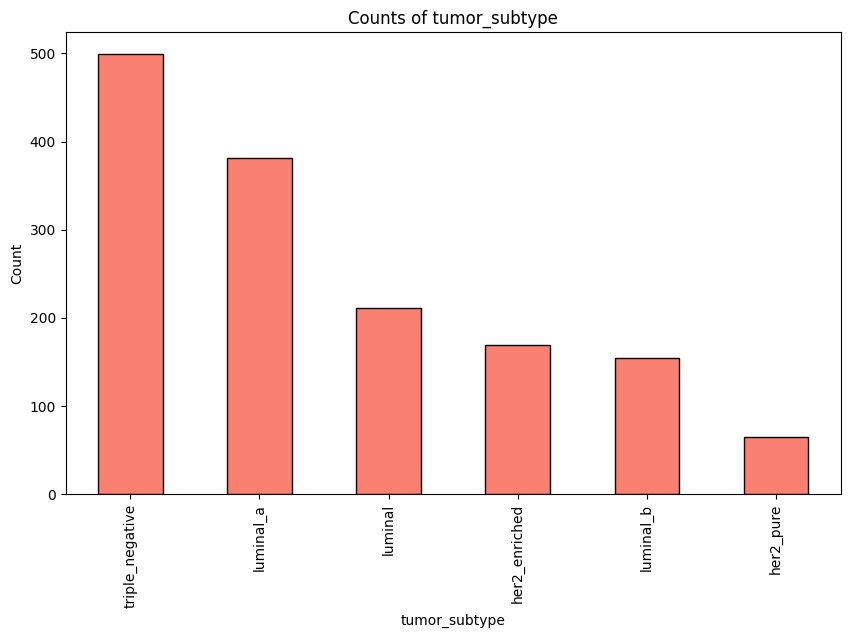

In [7]:
# Plot counts for a categorical column (e.g., 'tumor_subtype')
plot_categorical_counts(clinical_data_df, 'tumor_subtype')

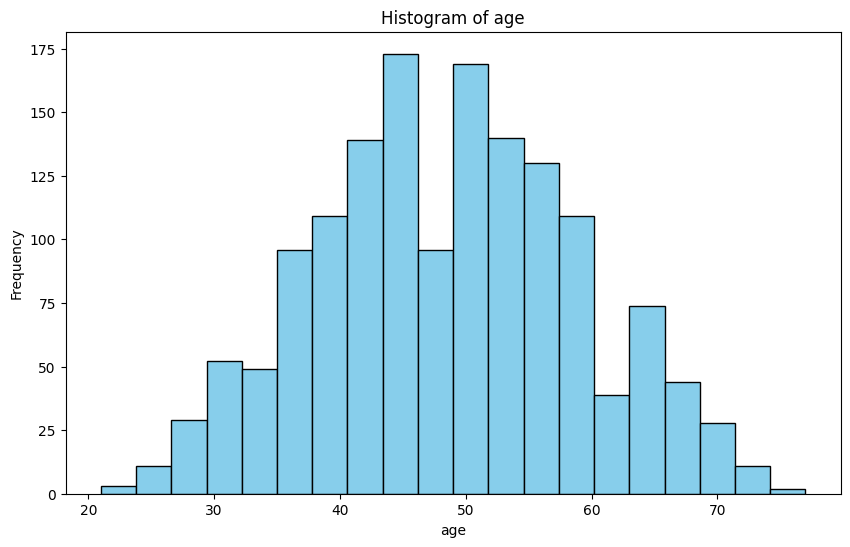

In [8]:
# Plot histogram for a numeric column (e.g., 'age')
plot_histogram(clinical_data_df, 'age')

/home/lidia/source/MAMA-MIA/notebooks/../src/clinical_data.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_column, y=numeric_column, data=data, palette="Set2")


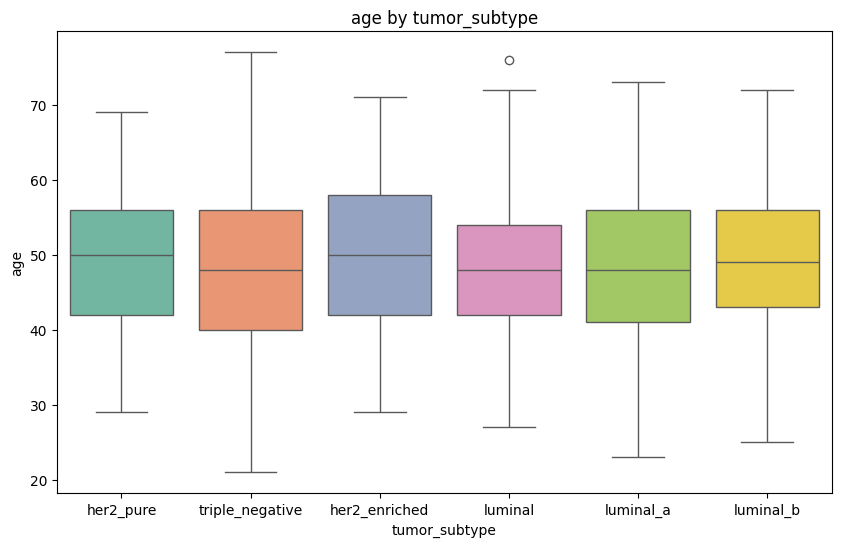

In [9]:
# Comparison plot (e.g., age by tumor subtype)
plot_comparison(clinical_data_df, 'age', 'tumor_subtype')